# Transformations exploration

Below are different transformations tried to optimize the original network.
This template is used to compare the results:
- Model trained: CDNA|DNA|STP
- Iteration trained: X|X|X
- Epoch trained: X|X|X
- Epoch elapsed time: Xs|Xs|Xs
- Loss training MEAN: X|X|X
- Loss training STD: X|X|X
- Loss training MIN: X|X|X
- Loss training MAX: X|X|X
- PSNR training: X|X|X
- Prediction results: [IMG]
- Curves results: [IMG]

## 01 - New Layer Normalization from Chainer master branch

The current (v2.0.1) version of Chainer implements a basic Layer Normalization technique. The current master branch of the repository contain the new implementation that will be released in newer version.

- Model trained: CDNA
- Iteration trained: 1180
- Epoch trained: 150
- Epoch elapsed time: 53.8662729263
- Loss training MEAN: 0.0012311265
- Loss training STD: 0.00010968733
- Loss training MIN: 0.0010535434
- Loss training MAX: 0.001378192
- PSNR training: X|X|X
- Prediction results:
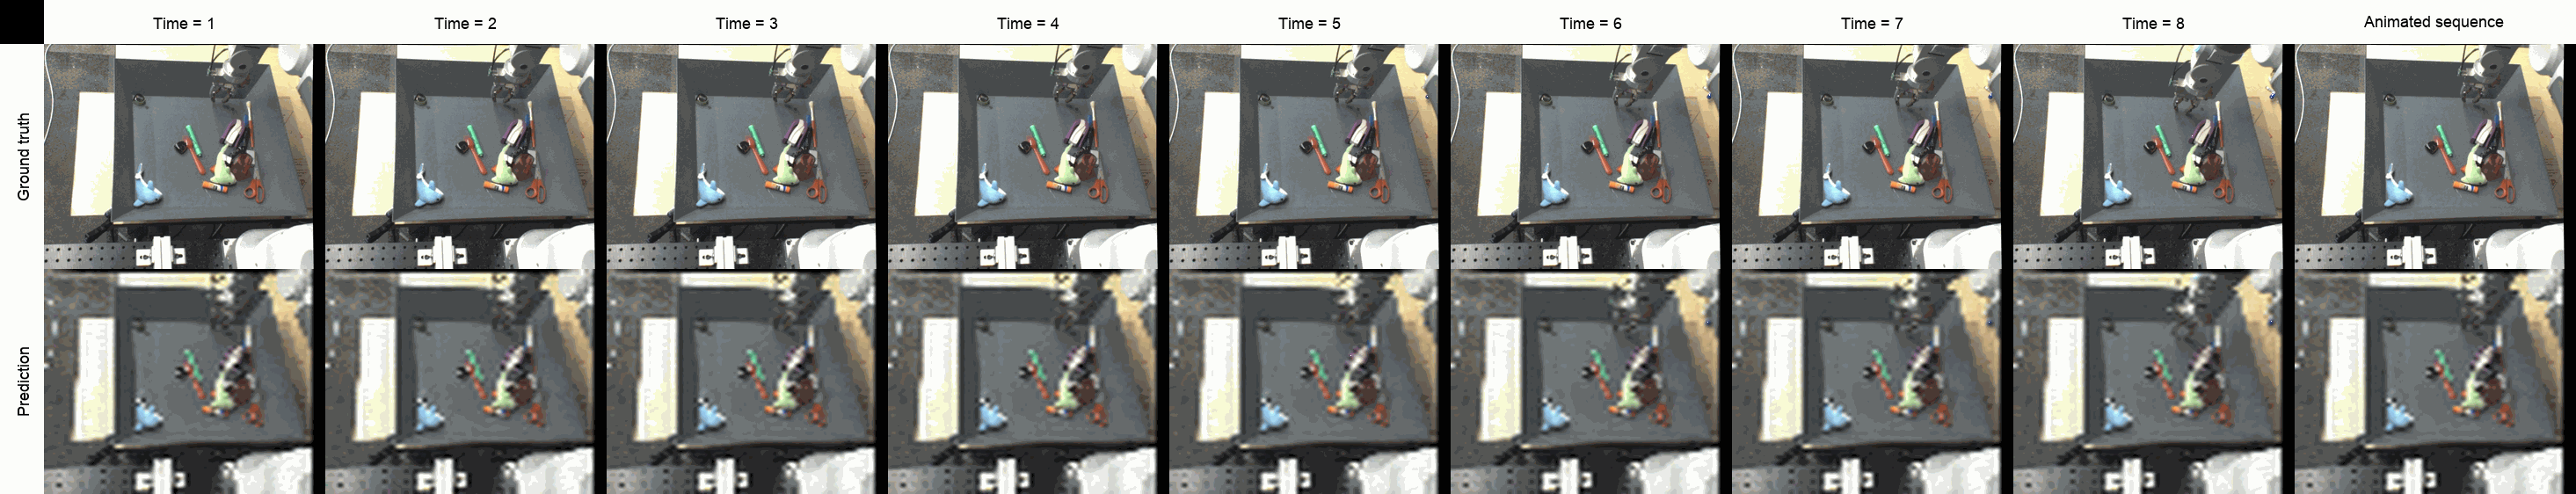
- Curves results:
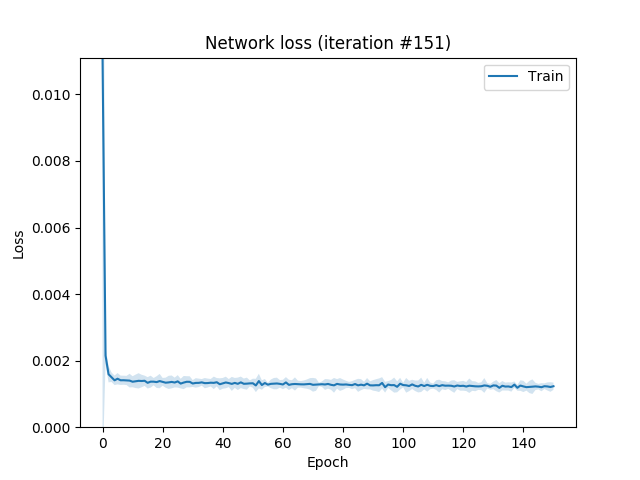

## 02 - SELU activation function

From the paper "Self-Normalizing Neural Networks". The SELU activation function is supposed to achieve zero means and unit variance. It eliminate the needs of normalizing methods (batch normalization, layer normalization, weight normalization, ...) and is supposed to be better than other activations methods.
For the current implementation: replaced all the Layer Normalization and ReLU functions for SELUs.

In [ ]:
def ops_selu():
     def ops(args):
         x = args.get("x")
         x = custom_selu(x)
         return x
     return ops


 # Create an executable array containing all the transformations
 self.ops = [
     [self.enc0],
     [self.lstm1, ops_selu(), ops_save("hidden1"), self.lstm2, ops_selu(), ops_save("hidden2"), self.enc1],
     [self.lstm3, ops_selu(), ops_save("hidden3"), self.lstm4, ops_selu(), ops_save("hidden4"), self.enc2],
     [ops_smear(use_state), self.enc3],
     [self.lstm5, ops_selu(), ops_save("hidden5"), self.enc4],
     [self.lstm6, ops_selu(), ops_save("hidden6"), ops_skip_connection(1), self.enc5],
     [self.lstm7, ops_selu(), ops_save("hidden7"), ops_skip_connection(0), self.enc6]
 ]

- Model trained: CDNA
- Iteration trained: 7300
- Epoch trained: 935
- Epoch elapsed time: 54.4679780006s
- Loss training MEAN: 0.13634264
- Loss training STD: 0.00732242
- Loss training MIN: 0.12211888
- Loss training MAX: 0.14484441
- PSNR training: X|X|X
- Prediction results:
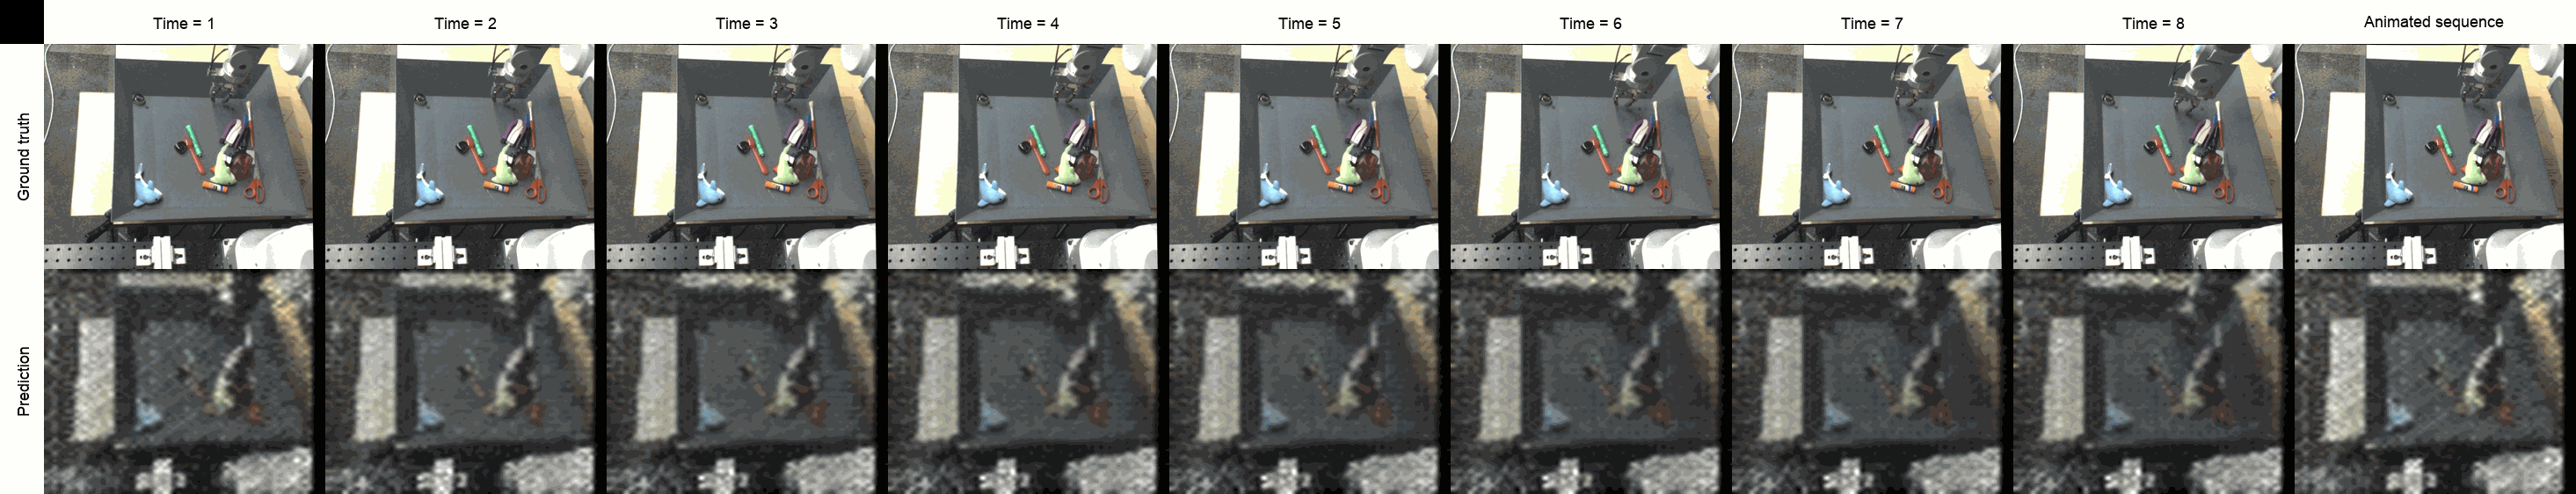
- Curves results:
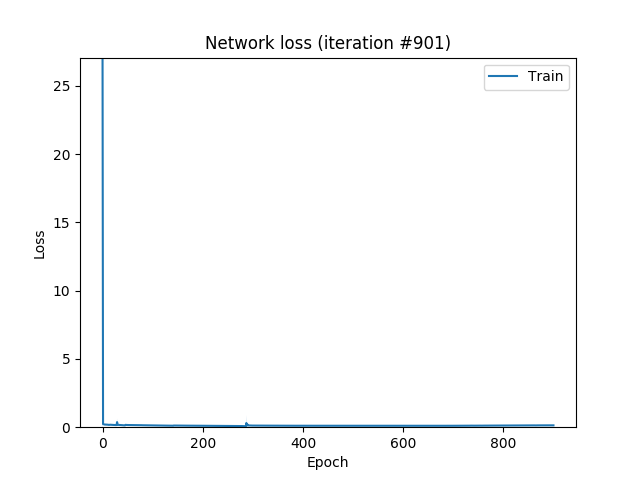